## Data Mining project: Discover and describe areas of interest and events from geo-located data

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, kmeans_plusplus



In [35]:
data_path="flickr_data2.csv"
df=pd.read_csv(data_path)
df.head(n=5)

C:\Users\abouziane\AppData\Local\Temp\ipykernel_10612\3555437615.py:2: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(data_path)


,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,4395181099,30624617@N03,45.754858,4.821710,"chair,lyon,rhône,chaise,rhônealpes",Chaises avec vue,11.0,15,28,2,2010,23,20,28.0,2,2010.0,NaN,NaN,NaN
1,4394748717,35853470@N00,45.753270,4.862953,NaN,NaN,51.0,17,28,2,2010,52,17,28.0,2,2010.0,NaN,NaN,NaN
2,4394694699,11817998@N05,45.760655,4.846564,"365,iphone",59/365 - R46 V103 B163,29.0,17,28,2,2010,33,17,28.0,2,2010.0,NaN,NaN,NaN
3,4394803790,11545749@N06,45.784000,4.874072,"nin,nineinchnails,gift,screening,toiou,avott",2010-01-29 Toiou Avott Lyon,15.0,20,28,1,2010,38,12,28.0,2,2010.0,NaN,NaN,NaN
4,4394803554,11545749@N06,45.784000,4.874072,"lyon,nin,nineinchnails,gift,screening,toiou,avott",2010-01-28 Toiou Avott Lyon,10.0,20,28,1,2010,38,12,28.0,2,2010.0,NaN,NaN,NaN


## Discover the data

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420240 entries, 0 to 420239
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   420240 non-null  int64  
 1    user                420240 non-null  object 
 2    lat                 420240 non-null  float64
 3    long                420240 non-null  float64
 4    tags                316730 non-null  object 
 5    title               381911 non-null  object 
 6    date_taken_minute   420239 non-null  float64
 7    date_taken_hour     420240 non-null  int64  
 8    date_taken_day      420240 non-null  int64  
 9    date_taken_month    420240 non-null  int64  
 10   date_taken_year     420240 non-null  int64  
 11   date_upload_minute  420228 non-null  object 
 12   date_upload_hour    420238 non-null  object 
 13   date_upload_day     420238 non-null  float64
 14   date_upload_month   420240 non-null  int64  
 15   date_upload_year

We notice that the Unnamed columns are all almost empty ,but are filled when data is incoherent . Finally , we decided to just eraze the rows where Unnamed columns are defined , and then we dropped the three columns .

In [37]:
df = df.drop_duplicates(subset=['id'], keep='first')
df = df[df[['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18']].isnull().all(axis=1)]


df.drop(columns=['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168050 entries, 0 to 419137
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   168050 non-null  int64  
 1    user                168050 non-null  object 
 2    lat                 168050 non-null  float64
 3    long                168050 non-null  float64
 4    tags                126069 non-null  object 
 5    title               152273 non-null  object 
 6    date_taken_minute   168050 non-null  float64
 7    date_taken_hour     168050 non-null  int64  
 8    date_taken_day      168050 non-null  int64  
 9    date_taken_month    168050 non-null  int64  
 10   date_taken_year     168050 non-null  int64  
 11   date_upload_minute  168050 non-null  object 
 12   date_upload_hour    168050 non-null  object 
 13   date_upload_day     168050 non-null  float64
 14   date_upload_month   168050 non-null  int64  
 15   date_upload_year    1

We also thought about working on data points located in the Lyon region in a defined radius . We define this zone by       

lat_min, lat_max = 45.65, 45.85


lon_min, lon_max = 4.75, 4.95

In [38]:


# Define the bounding box coordinates for the Lyon region
lat_min, lat_max = 45.65, 45.85
lon_min, lon_max = 4.75, 4.95

# Calculate the center of the bounding box
center_lat = (lat_min + lat_max) / 2
center_lon = (lon_min + lon_max) / 2

# Create a map centered on the Lyon region
lyon_map = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Define the coordinates for the bounding box
bounding_box_coords = [
    [lat_min, lon_min],  # Bottom-left
    [lat_min, lon_max],  # Bottom-right
    [lat_max, lon_max],  # Top-right
    [lat_max, lon_min],  # Top-left
    [lat_min, lon_min]   # Close the polygon
]

# Add the bounding box to the map
folium.PolyLine(bounding_box_coords, color='blue', weight=2).add_to(lyon_map)

# Display the map
lyon_map.save("lyon_region_map.html")
lyon_map  # This will render the map in a Jupyter Notebook environment if supported



In [39]:


# Filter the DataFrame based on latitude and longitude ranges
filtered_df = df[(df[' lat'] >= lat_min) & (df[' lat'] <= lat_max) &
                 (df[' long'] >= lon_min) & (df[' long'] <= lon_max)]

# Display the filtered DataFrame
filtered_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 161654 entries, 0 to 419137
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   161654 non-null  int64  
 1    user                161654 non-null  object 
 2    lat                 161654 non-null  float64
 3    long                161654 non-null  float64
 4    tags                121622 non-null  object 
 5    title               146375 non-null  object 
 6    date_taken_minute   161654 non-null  float64
 7    date_taken_hour     161654 non-null  int64  
 8    date_taken_day      161654 non-null  int64  
 9    date_taken_month    161654 non-null  int64  
 10   date_taken_year     161654 non-null  int64  
 11   date_upload_minute  161654 non-null  object 
 12   date_upload_hour    161654 non-null  object 
 13   date_upload_day     161654 non-null  float64
 14   date_upload_month   161654 non-null  int64  
 15   date_upload_year    1

In [45]:
sampled_df=filtered_df.sample(n=50000,random_state=42)
def lat_long_to_cartesian(lat, long):
    lat_rad = np.radians(lat)
    long_rad = np.radians(long)
    x = np.cos(lat_rad) * np.cos(long_rad)
    y = np.cos(lat_rad) * np.sin(long_rad)
    z = np.sin(lat_rad)
    return np.array([x, y, z])


coords = sampled_df[[' lat', ' long']].to_numpy()
cartesian_coords = np.array([lat_long_to_cartesian(lat, long) for lat, long in coords])
x_squared_norms = np.sum(cartesian_coords ** 2, axis=1)

In [46]:

# num_clusters = 3  # Adjust this value as needed
# init_centers, _ = kmeans_plusplus(cartesian_coords, n_clusters=num_clusters, random_state=42, x_squared_norms=x_squared_norms)

# # Perform KMeans clustering with initialized centers
# kmeans = KMeans(n_clusters=num_clusters, init=init_centers, n_init=1, random_state=42)
# filtered_df['cluster'] = kmeans.fit_predict(cartesian_coords)

here
Initialization complete
Iteration 0, inertia 0.0007480710093542384.
Iteration 1, inertia 0.0005961693729844035.
Iteration 2, inertia 0.0005779977907309793.
Iteration 3, inertia 0.0005733438905291333.
Iteration 4, inertia 0.0005711845832463303.
Iteration 5, inertia 0.0005701234700092443.
Iteration 6, inertia 0.000569931603757094.
Converged at iteration 6: center shift 5.3841971823386e-12 within tolerance 1.0708077377648978e-11.


h:\TP Data Mining\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1414: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=5.
  super()._check_params_vs_input(X, default_n_init=10)


Processed 20 clusters
here
Initialization complete
Iteration 0, inertia 0.000683634605284803.
Iteration 1, inertia 0.0005567150589537079.
Iteration 2, inertia 0.0005360086287817089.
Iteration 3, inertia 0.0005263267724195473.
Iteration 4, inertia 0.0005203776887720079.
Iteration 5, inertia 0.0005164573871566026.
Iteration 6, inertia 0.0005138705171595548.
Iteration 7, inertia 0.0005120100547241005.
Iteration 8, inertia 0.0005116148099953188.
Iteration 9, inertia 0.0005112358690265357.
Iteration 10, inertia 0.0005108752188700459.
Iteration 11, inertia 0.0005106389346137676.
Iteration 12, inertia 0.0005103660607237105.
Iteration 13, inertia 0.0005101910517998082.
Iteration 14, inertia 0.0005100535972343095.
Iteration 15, inertia 0.0005099371030569905.
Converged at iteration 15: center shift 9.196279030854037e-12 within tolerance 1.0708077377648978e-11.


h:\TP Data Mining\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1414: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=5.
  super()._check_params_vs_input(X, default_n_init=10)


Processed 21 clusters
here
Initialization complete
Iteration 0, inertia 0.000668179627951738.
Iteration 1, inertia 0.0005389023984702626.
Iteration 2, inertia 0.0005142096787994787.
Iteration 3, inertia 0.000502198795440498.
Iteration 4, inertia 0.0004956563282729417.
Iteration 5, inertia 0.0004918530269110384.
Iteration 6, inertia 0.0004894389384126512.
Iteration 7, inertia 0.0004873561332562048.
Iteration 8, inertia 0.0004869534241404133.
Iteration 9, inertia 0.0004868037772690742.
Iteration 10, inertia 0.0004866432665542023.
Iteration 11, inertia 0.0004864587980167842.
Iteration 12, inertia 0.0004862460396173887.
Iteration 13, inertia 0.0004860074648608536.
Iteration 14, inertia 0.00048591443382338596.
Iteration 15, inertia 0.0004858677363487462.
Converged at iteration 15: center shift 7.592198010145135e-12 within tolerance 1.0708077377648978e-11.


h:\TP Data Mining\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1414: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=5.
  super()._check_params_vs_input(X, default_n_init=10)


Processed 22 clusters
here
Initialization complete
Iteration 0, inertia 0.0006116453327467699.
Iteration 1, inertia 0.0005050932818853756.
Iteration 2, inertia 0.0004887686635209956.
Iteration 3, inertia 0.0004832327591767578.
Iteration 4, inertia 0.0004812965916255245.
Iteration 5, inertia 0.0004762107400717015.
Iteration 6, inertia 0.00047307372665037807.
Iteration 7, inertia 0.0004717885051268819.
Iteration 8, inertia 0.0004703568663711954.
Iteration 9, inertia 0.0004692485215357079.
Iteration 10, inertia 0.00046886029160512653.
Iteration 11, inertia 0.000468686708832187.
Iteration 12, inertia 0.00046856785504773187.
Iteration 13, inertia 0.0004684384524753364.
Iteration 14, inertia 0.0004682735775940698.
Iteration 15, inertia 0.0004681660556474885.
Iteration 16, inertia 0.0004680957170782784.
Converged at iteration 16: center shift 6.607951171055542e-12 within tolerance 1.0708077377648978e-11.


h:\TP Data Mining\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1414: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=5.
  super()._check_params_vs_input(X, default_n_init=10)


Processed 23 clusters
here
Initialization complete
Iteration 0, inertia 0.0005835269555412756.
Iteration 1, inertia 0.00047814569396687206.
Iteration 2, inertia 0.0004616401810990845.
Iteration 3, inertia 0.00045607332092354006.
Iteration 4, inertia 0.0004542098814868595.
Iteration 5, inertia 0.0004491158293675652.
Iteration 6, inertia 0.0004459749220131882.
Iteration 7, inertia 0.0004446718525369994.
Iteration 8, inertia 0.0004432279205021755.
Iteration 9, inertia 0.00044211348721639174.
Iteration 10, inertia 0.0004417236275020037.
Iteration 11, inertia 0.0004415480440633536.
Iteration 12, inertia 0.00044142949769723555.
Iteration 13, inertia 0.000441300219665086.
Iteration 14, inertia 0.0004411350882078501.
Iteration 15, inertia 0.00044102754441229707.
Iteration 16, inertia 0.00044095733127051076.
Converged at iteration 16: center shift 6.658570320014534e-12 within tolerance 1.0708077377648978e-11.


h:\TP Data Mining\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1414: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=5.
  super()._check_params_vs_input(X, default_n_init=10)


Processed 24 clusters
here
Initialization complete
Iteration 0, inertia 0.0005573800297196331.
Iteration 1, inertia 0.00045975696742468655.
Iteration 2, inertia 0.00044722104014223966.
Iteration 3, inertia 0.00044464027592896305.
Iteration 4, inertia 0.0004432099759279711.
Iteration 5, inertia 0.00043823445160106114.
Iteration 6, inertia 0.00043527779092967557.
Iteration 7, inertia 0.0004339059949456448.
Iteration 8, inertia 0.00043255842188054925.
Iteration 9, inertia 0.0004312905651878662.
Iteration 10, inertia 0.00043082579798060333.
Iteration 11, inertia 0.0004306658251213839.
Iteration 12, inertia 0.0004305640456630237.
Iteration 13, inertia 0.00043046192963105696.
Iteration 14, inertia 0.0004303509099538095.
Iteration 15, inertia 0.00043030271282938273.
Iteration 16, inertia 0.0004302746581390818.
Converged at iteration 16: center shift 8.335260647495074e-12 within tolerance 1.0708077377648978e-11.


h:\TP Data Mining\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1414: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=5.
  super()._check_params_vs_input(X, default_n_init=10)


Processed 25 clusters
here
Initialization complete
Iteration 0, inertia 0.0005389881456989697.
Iteration 1, inertia 0.00043460889605808955.
Iteration 2, inertia 0.0004214834116229715.
Iteration 3, inertia 0.0004180402530437185.
Iteration 4, inertia 0.0004165524807428048.
Iteration 5, inertia 0.000416096474281153.
Iteration 6, inertia 0.00041587402105221926.
Iteration 7, inertia 0.0004156062338327761.
Iteration 8, inertia 0.0004154981646328723.
Converged at iteration 8: center shift 7.279886968580426e-12 within tolerance 1.0708077377648978e-11.


h:\TP Data Mining\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1414: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=5.
  super()._check_params_vs_input(X, default_n_init=10)


Processed 26 clusters
here
Initialization complete
Iteration 0, inertia 0.0005216993761969402.
Iteration 1, inertia 0.00041355306472162583.
Iteration 2, inertia 0.0004008301308624095.
Iteration 3, inertia 0.000397337318529957.
Iteration 4, inertia 0.00039360803884286067.
Iteration 5, inertia 0.0003890076752006197.
Iteration 6, inertia 0.0003844679625072117.
Iteration 7, inertia 0.00038350954873276325.
Iteration 8, inertia 0.0003834071380217803.
Iteration 9, inertia 0.0003833758329749223.
Converged at iteration 9: center shift 7.760309199821088e-12 within tolerance 1.0708077377648978e-11.


h:\TP Data Mining\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1414: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=5.
  super()._check_params_vs_input(X, default_n_init=10)


Processed 27 clusters
here
Initialization complete
Iteration 0, inertia 0.0004950287196211489.
Iteration 1, inertia 0.0003975725493720427.
Iteration 2, inertia 0.00038928917980030075.
Iteration 3, inertia 0.0003862547084953914.
Iteration 4, inertia 0.0003826354954272284.
Iteration 5, inertia 0.00037807628846500576.
Iteration 6, inertia 0.0003734945482495789.
Iteration 7, inertia 0.00037253957078158163.
Iteration 8, inertia 0.0003724594713988581.
Iteration 9, inertia 0.000372442077447977.
Converged at iteration 9: center shift 6.5147680441381795e-12 within tolerance 1.0708077377648978e-11.


h:\TP Data Mining\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1414: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=5.
  super()._check_params_vs_input(X, default_n_init=10)


Processed 28 clusters
here
Initialization complete
Iteration 0, inertia 0.0004773724700221668.
Iteration 1, inertia 0.00038986307598929873.
Iteration 2, inertia 0.0003811629582574838.
Iteration 3, inertia 0.00037793394000406005.
Iteration 4, inertia 0.0003743069008095164.
Iteration 5, inertia 0.0003696726218898694.
Iteration 6, inertia 0.0003649659994335227.
Iteration 7, inertia 0.0003638814168988228.
Iteration 8, inertia 0.00036349009011901306.
Iteration 9, inertia 0.0003633175955911698.
Iteration 10, inertia 0.0003632618971876787.
Iteration 11, inertia 0.0003632265902001506.
Iteration 12, inertia 0.00036319575633096397.
Iteration 13, inertia 0.00036313492741201604.
Iteration 14, inertia 0.0003630006385327049.
Iteration 15, inertia 0.0003628866935321216.
Iteration 16, inertia 0.0003628064195212093.
Iteration 17, inertia 0.0003627723851225376.
Converged at iteration 17: center shift 9.595024021600778e-12 within tolerance 1.0708077377648978e-11.


h:\TP Data Mining\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1414: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=5.
  super()._check_params_vs_input(X, default_n_init=10)


Processed 29 clusters
here
Initialization complete
Iteration 0, inertia 0.0004608854704460264.
Iteration 1, inertia 0.00037920060091446814.
Iteration 2, inertia 0.0003700817839090186.
Iteration 3, inertia 0.0003668069563728057.
Iteration 4, inertia 0.00036306794116578546.
Iteration 5, inertia 0.0003583540874131315.
Iteration 6, inertia 0.00035364785626101127.
Iteration 7, inertia 0.0003525644860068046.
Iteration 8, inertia 0.0003521737948266455.
Iteration 9, inertia 0.00035200289451308033.
Iteration 10, inertia 0.0003519558245178186.
Iteration 11, inertia 0.00035192660442461877.
Iteration 12, inertia 0.00035189645743592115.
Iteration 13, inertia 0.0003518520942244024.
Iteration 14, inertia 0.0003517240681636993.
Iteration 15, inertia 0.0003516073719535842.
Iteration 16, inertia 0.0003515109313567301.
Iteration 17, inertia 0.00035147015607920153.
Iteration 18, inertia 0.00035144854992074563.
Converged at iteration 18: center shift 9.230077082276453e-12 within tolerance 1.070807737764897

h:\TP Data Mining\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1414: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=5.
  super()._check_params_vs_input(X, default_n_init=10)


Processed 30 clusters
here
Initialization complete
Iteration 0, inertia 0.00044956895413982007.
Iteration 1, inertia 0.00036948772239019085.
Iteration 2, inertia 0.0003603896952412731.
Iteration 3, inertia 0.0003571153116226458.
Iteration 4, inertia 0.00035315202099393985.
Iteration 5, inertia 0.0003484456231704459.
Iteration 6, inertia 0.00034342562381122936.
Iteration 7, inertia 0.0003421161451793257.
Iteration 8, inertia 0.0003417715767986369.
Iteration 9, inertia 0.0003415658458610023.
Iteration 10, inertia 0.0003414682233321588.
Iteration 11, inertia 0.00034140494881983245.
Iteration 12, inertia 0.00034136459264097507.
Converged at iteration 12: center shift 8.084055518584512e-12 within tolerance 1.0708077377648978e-11.


h:\TP Data Mining\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1414: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=5.
  super()._check_params_vs_input(X, default_n_init=10)


Processed 31 clusters
here
Initialization complete
Iteration 0, inertia 0.0004310190476672538.
Iteration 1, inertia 0.0003480826555578748.
Iteration 2, inertia 0.0003393236036008893.
Iteration 3, inertia 0.00033684273979192044.
Iteration 4, inertia 0.0003356550457289069.
Iteration 5, inertia 0.00033523874827591494.
Iteration 6, inertia 0.0003346594509549217.
Iteration 7, inertia 0.00033428999532189146.
Iteration 8, inertia 0.0003342064883041208.
Iteration 9, inertia 0.0003341010142600095.
Iteration 10, inertia 0.0003340319831975461.
Iteration 11, inertia 0.00033394176986802136.
Iteration 12, inertia 0.00033389643745736805.
Iteration 13, inertia 0.0003338570588824374.
Iteration 14, inertia 0.000333822453886954.
Converged at iteration 14: center shift 9.34090299289685e-12 within tolerance 1.0708077377648978e-11.


h:\TP Data Mining\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1414: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=5.
  super()._check_params_vs_input(X, default_n_init=10)


Processed 32 clusters
here
Initialization complete
Iteration 0, inertia 0.0004127787707445332.
Iteration 1, inertia 0.0003412234827979862.
Iteration 2, inertia 0.00032934014571155834.
Iteration 3, inertia 0.00032584292721524557.
Iteration 4, inertia 0.00032418867614118497.
Iteration 5, inertia 0.00032376483735361314.
Iteration 6, inertia 0.0003231457378357361.
Iteration 7, inertia 0.00032270525120450214.
Iteration 8, inertia 0.0003216848716773446.
Iteration 9, inertia 0.0003203600400099335.
Iteration 10, inertia 0.00031956820896007673.
Iteration 11, inertia 0.0003194082308178317.
Iteration 12, inertia 0.00031936632849006953.
Converged at iteration 12: center shift 9.597884694597005e-12 within tolerance 1.0708077377648978e-11.


h:\TP Data Mining\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1414: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=5.
  super()._check_params_vs_input(X, default_n_init=10)


Processed 33 clusters
here
Initialization complete
Iteration 0, inertia 0.0003971713323234401.
Iteration 1, inertia 0.00032404636397585866.
Iteration 2, inertia 0.0003111298914692692.
Iteration 3, inertia 0.0003073475802421732.
Iteration 4, inertia 0.0003056267186358606.
Iteration 5, inertia 0.00030520801505070077.
Iteration 6, inertia 0.0003049820160857726.
Iteration 7, inertia 0.0003045181727165448.
Iteration 8, inertia 0.0003043333725413439.
Iteration 9, inertia 0.0003043136113360928.
Converged at iteration 9: center shift 4.095707608868474e-12 within tolerance 1.0708077377648978e-11.


h:\TP Data Mining\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1414: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=5.
  super()._check_params_vs_input(X, default_n_init=10)


Processed 34 clusters
here
Initialization complete
Iteration 0, inertia 0.00038686630185125393.
Iteration 1, inertia 0.0003126917698856802.
Iteration 2, inertia 0.0002997464151050797.
Iteration 3, inertia 0.0002959610338044485.
Iteration 4, inertia 0.0002942374865937689.
Iteration 5, inertia 0.00029381757929180234.
Iteration 6, inertia 0.0002935914038213052.
Iteration 7, inertia 0.0002931269066537376.
Iteration 8, inertia 0.0002929415428510248.
Iteration 9, inertia 0.00029291894762980804.
Converged at iteration 9: center shift 3.743293489265756e-12 within tolerance 1.0708077377648978e-11.


h:\TP Data Mining\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1414: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=5.
  super()._check_params_vs_input(X, default_n_init=10)


Processed 35 clusters
here
Initialization complete
Iteration 0, inertia 0.00037503583968253977.
Iteration 1, inertia 0.0003002630206031783.
Iteration 2, inertia 0.0002888378208664927.
Iteration 3, inertia 0.0002857712402659731.
Iteration 4, inertia 0.00028467574933896113.
Iteration 5, inertia 0.00028433986784918205.
Iteration 6, inertia 0.00028414795192451486.
Iteration 7, inertia 0.0002835369808750096.
Iteration 8, inertia 0.0002832675723892451.
Iteration 9, inertia 0.0002832314170936167.
Converged at iteration 9: center shift 6.682816976786544e-12 within tolerance 1.0708077377648978e-11.


h:\TP Data Mining\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1414: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=5.
  super()._check_params_vs_input(X, default_n_init=10)


Processed 36 clusters
here
Initialization complete
Iteration 0, inertia 0.0003600231644722089.
Iteration 1, inertia 0.00028649439201351994.
Iteration 2, inertia 0.00027973746646335265.
Iteration 3, inertia 0.00027810894597873106.
Iteration 4, inertia 0.0002774266445807211.
Iteration 5, inertia 0.00027707831960607055.
Iteration 6, inertia 0.00027689679203353115.
Iteration 7, inertia 0.00027631825688536715.
Iteration 8, inertia 0.0002760525509136007.
Iteration 9, inertia 0.000276012039014931.
Converged at iteration 9: center shift 9.816204025060316e-12 within tolerance 1.0708077377648978e-11.


h:\TP Data Mining\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1414: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=5.
  super()._check_params_vs_input(X, default_n_init=10)


Processed 37 clusters
here
Initialization complete
Iteration 0, inertia 0.00034788534796770514.
Iteration 1, inertia 0.00028112264825903263.
Iteration 2, inertia 0.00027422966039261236.
Iteration 3, inertia 0.00027143282420440216.
Iteration 4, inertia 0.00026982856494685054.
Iteration 5, inertia 0.00026863842274371815.
Iteration 6, inertia 0.0002681387603463084.
Iteration 7, inertia 0.0002675805335344181.
Iteration 8, inertia 0.00026733778511638687.
Iteration 9, inertia 0.0002672411662391348.
Iteration 10, inertia 0.0002671728595964759.
Converged at iteration 10: center shift 9.649103925810132e-12 within tolerance 1.0708077377648978e-11.


h:\TP Data Mining\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1414: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=5.
  super()._check_params_vs_input(X, default_n_init=10)


Processed 38 clusters
here
Initialization complete
Iteration 0, inertia 0.00033922577471018085.
Iteration 1, inertia 0.00027559453021344844.
Iteration 2, inertia 0.00026833599154049194.
Iteration 3, inertia 0.00026554516417472715.
Iteration 4, inertia 0.0002637692721860724.
Iteration 5, inertia 0.0002628705246927025.
Iteration 6, inertia 0.0002620695552282153.
Iteration 7, inertia 0.00026167839737473717.
Iteration 8, inertia 0.0002615525536011073.
Iteration 9, inertia 0.0002615019908048013.
Iteration 10, inertia 0.00026148128323145363.
Converged at iteration 10: center shift 2.0027789805476284e-12 within tolerance 1.0708077377648978e-11.


h:\TP Data Mining\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1414: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=5.
  super()._check_params_vs_input(X, default_n_init=10)


Processed 39 clusters


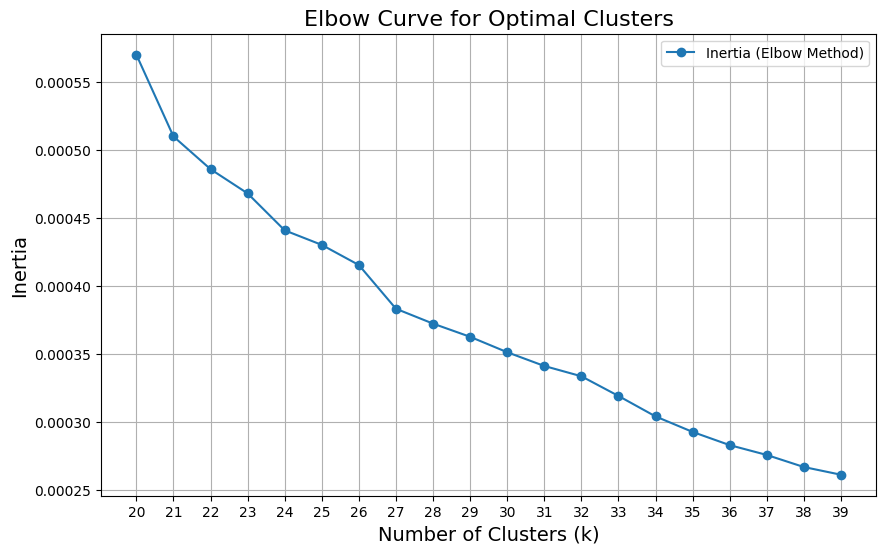

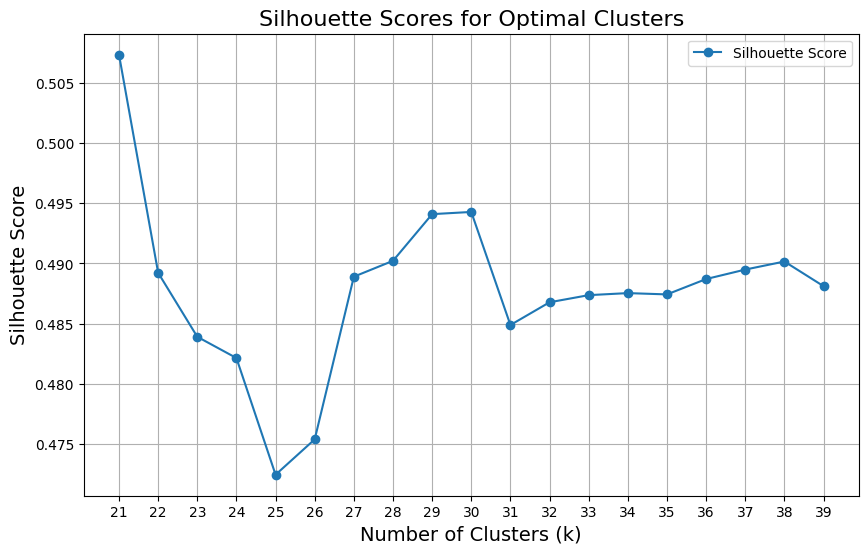

In [47]:
# Define the range of cluster numbers to test
cluster_range = range(20, 40)
inertia_values = []
silhouette_scores = []

# Compute inertia and silhouette scores for each number of clusters
for k in cluster_range:
    # Use kmeans_plusplus to initialize centroids
    init_centers, _ = kmeans_plusplus(cartesian_coords, n_clusters=k, random_state=42, x_squared_norms=x_squared_norms)
    print("here")
    # Fit KMeans with initialized centroids
    kmeans = KMeans(n_clusters=k, init=init_centers, n_init=5, random_state=42,verbose=1)
    kmeans.fit(cartesian_coords)
    
    # Store inertia value
    inertia_values.append(kmeans.inertia_)
    
    # Compute silhouette score for k > 1
    if k > 1:
        silhouette_scores.append(silhouette_score(cartesian_coords, kmeans.labels_))
    else:
        silhouette_scores.append(None)  # Silhouette score is undefined for k=1
    
    print(f'Processed {k} clusters')

# Plot the elbow curve (inertia values)
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o', label='Inertia (Elbow Method)')
plt.title('Elbow Curve for Optimal Clusters', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.xticks(cluster_range)
plt.legend()
plt.grid(True)
plt.show()

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range[1:], silhouette_scores[1:], marker='o', label='Silhouette Score')
plt.title('Silhouette Scores for Optimal Clusters', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.xticks(cluster_range[1:])
plt.legend()
plt.grid(True)
plt.show()


we will go for 29 clusters

In [51]:
n_clusters=29
init_centers, _ = kmeans_plusplus(cartesian_coords, n_clusters=n_clusters, random_state=42, x_squared_norms=x_squared_norms)
kmeans = KMeans(n_clusters=n_clusters, init=init_centers, n_init=5, random_state=42)
kmeans.fit(cartesian_coords)

h:\TP Data Mining\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1414: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=5.
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(init=array([[0.6951617 , 0.05865077, 0.71645677],
       [0.69466887, 0.05894351, 0.71691061],
       [0.69422615, 0.0586178 , 0.71736602],
       [0.69557542, 0.05871677, 0.7160497 ],
       [0.69520329, 0.05946971, 0.71634889],
       [0.6949998 , 0.05904451, 0.71658149],
       [0.69618495, 0.05809524, 0.71550783],
       [0.69562006, 0.05938334, 0.71595136],
       [0.69521381, 0.05876609, 0.71639675],
       [0.69438555, 0.059597...
       [0.69518411, 0.05793049, 0.71649362],
       [0.69509426, 0.05870918, 0.71651741],
       [0.69517153, 0.05903902, 0.71641534],
       [0.69406898, 0.05891724, 0.71749356],
       [0.69497614, 0.05879646, 0.71662482],
       [0.69531254, 0.05866036, 0.71630959],
       [0.69528543, 0.05895979, 0.71631132],
       [0.69515081, 0.05850842, 0.71647897],
       [0.69503789, 0.05843554, 0.71659446]]),
       n_clusters=29, n_init=5, random_state=42)

In [58]:

sampled_df['cluster'] = kmeans.fit_predict(cartesian_coords).astype(int)  # Ensure cluster labels are integers

# Create a folium map centered around the data's mean latitude and longitude
map_center = [sampled_df[' lat'].mean(), sampled_df[' long'].mean()]
cluster_map = folium.Map(location=map_center, zoom_start=13)

# Define a list of colors for the clusters
colors = [
    'red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred',
    'beige', 'darkblue', 'darkgreen', 'cadetblue', 'pink', 'lightblue',
    'lightgreen', 'gray', 'black', 'lightgray', 'brown', 'darkpurple',
    'white', 'lightyellow', 'darkorange', 'teal', 'cyan', 'magenta'
]

# Plot each point on the map with a color corresponding to its cluster
for _, row in sampled_df.head(5000).iterrows():
    cluster_color = colors[int(row['cluster']) % len(colors)]  # Ensure cluster labels are integers
    folium.CircleMarker(
        location=[row[' lat'], row[' long']],
        radius=5,
        color=cluster_color,
        fill=True,
        fill_color=cluster_color,
        fill_opacity=0.7
    ).add_to(cluster_map)

# Save and display the map
cluster_map.save("cluster_map.html")
cluster_map  # This will render the map in a Jupyter Notebook if supported


h:\TP Data Mining\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1414: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=5.
  super()._check_params_vs_input(X, default_n_init=10)
